# CIFAR-10 Multiple Classes



-----

In [6]:
pip install tensorflow as tf

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as
ERROR: No matching distribution found for as


# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [1]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck

In [111]:
x_train.shape 

(50000, 32, 32, 3)

In [112]:
x_train[0].shape

(32, 32, 3)

In [113]:
import matplotlib.pyplot as plt

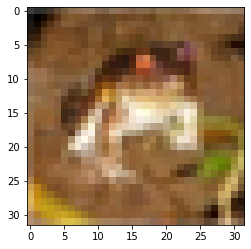

In [114]:
# FROG
plt.imshow(x_train[0])

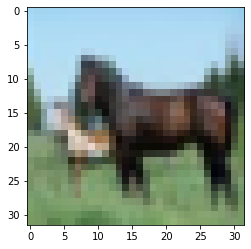

In [115]:
# HORSE
plt.imshow(x_train[12])

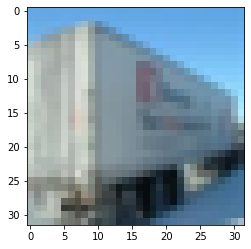

In [116]:
plt.imshow(x_train[15])

# PreProcessing

In [117]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [118]:
x_train[0].shape

(32, 32, 3)

In [119]:
#x_train.max()   #0- 255
x_train.min()

0

In [120]:
x_train = x_train/255

In [121]:
x_test = x_test/255

In [122]:
x_train.shape

(50000, 32, 32, 3)

In [123]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [124]:
from keras.utils import to_categorical

In [125]:
y_train.shape

(50000, 1)

In [126]:
y_train[0]

array([6], dtype=uint8)

In [127]:
y_categorical_train = to_categorical(y_train,10)

In [128]:
y_categorical_train.shape

(50000, 10)

In [129]:
y_categorical_train[12]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [130]:
y_cat_test = to_categorical(y_test,10)


----------
# Building the Model

In [131]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [135]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2))) #down sampling

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))


# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(  loss='categorical_crossentropy',
              optimizer='sgd','adam',
              metrics=['accuracy'])

In [136]:
#model.summary()
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]

In [137]:
#model.fit(x_train,y_categorical_train,verbose=1,epochs=10)
#history = model.fit(X_train, y_train, batch_size = 512,  nb_epoch = 5, validation_split = 0.05)
#history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# patient early stopping
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
history = model.fit(x_train, y_categorical_train, validation_data=(x_test, y_cat_test),  epochs=5, batch_size=10, verbose=1)
# list all data in history
print(history.history.keys())

Epoch 1/5
5000/5000 [==============================] - 14s 3ms/step - loss: 1.6586 - accuracy: 0.3922 - val_loss: 1.2256 - val_accuracy: 0.5645
Epoch 2/5
5000/5000 [==============================] - 13s 3ms/step - loss: 1.1822 - accuracy: 0.5785 - val_loss: 1.1388 - val_accuracy: 0.5976
Epoch 3/5
5000/5000 [==============================] - 13s 3ms/step - loss: 1.0227 - accuracy: 0.6393 - val_loss: 1.0662 - val_accuracy: 0.6282
Epoch 4/5
5000/5000 [==============================] - 13s 3ms/step - loss: 0.9020 - accuracy: 0.6844 - val_loss: 1.0442 - val_accuracy: 0.6431
Epoch 5/5
5000/5000 [==============================] - 13s 3ms/step - loss: 0.8101 - accuracy: 0.7172 - val_loss: 1.0256 - val_accuracy: 0.6531
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


A problem with training neural networks is in the choice of the number of training epochs to use.

Too many epochs can lead to overfitting of the training dataset, whereas too few may result in an underfit model. Early stopping is a method that allows you to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out validation dataset.

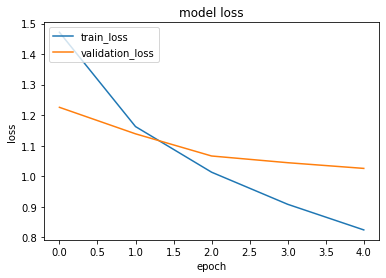

In [149]:
# summarize history for loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

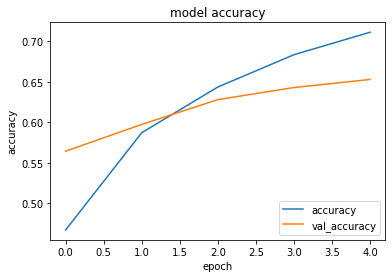

In [148]:
# summarize history for accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label= 'val_accuracy')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()

In [140]:

model.save('cifar_10epochs.h5')

In [142]:


# evaluate the model
#train_acc = model.evaluate(x_train, y_train, verbose=0)
#test_acc = model.evaluate(x_test, y_test, verbose=0)
model.evaluate(x_test,y_cat_test)
#model.evaluate(x_train, y_train)

313/313 [==============================] - 1s 3ms/step - loss: 1.0256 - accuracy: 0.6531


[1.0255687236785889, 0.6531000137329102]

In [143]:
classification  =  model.predict(x_test)
print(classification[0])
print(y_cat_test[0])

[0.00917992 0.00944954 0.04312498 0.65326244 0.00839354 0.14090984
 0.12898618 0.00088481 0.00374079 0.00206797]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
#model.summary()

In [152]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.64      0.71      0.68      1000
           1       0.76      0.71      0.73      1000
           2       0.45      0.56      0.50      1000
           3       0.44      0.43      0.44      1000
           4       0.53      0.54      0.53      1000
           5       0.55      0.53      0.54      1000
           6       0.66      0.75      0.70      1000
           7       0.76      0.60      0.67      1000
           8       0.64      0.79      0.71      1000
           9       0.86      0.50      0.63      1000

    accuracy                           0.61     10000
   macro avg       0.63      0.61      0.61     10000
weighted avg       0.63      0.61      0.61     10000



## Optional: Large Model

In [ ]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 512 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(512, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_categorical_train,verbose=1,epochs=20)

In [ ]:
cifar10

In [ ]:
model.evaluate(x_test,y_cat_test)

In [ ]:
from sklearn.metrics import classification_report

predictions = model.predict_classes(x_test)

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
model.save('larger_CIFAR10_model.h5')

___